In [38]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

#Loading the dataset
df = pd.read_csv("winequality-red.csv")
df['quality'] = df['quality'].replace({3:0, 4:0, 5:0, 6:1, 7:1, 8:1})
print(df['quality'].value_counts())
#Separating features and target class
X = df.iloc[:, :-1]
Y = df.iloc[:, -1]




quality
1    855
0    744
Name: count, dtype: int64


Average Accuracy Score: 0.6422838050314466
Average Precision Score: 0.6733028969884028
Average Recall Score: 0.6512585499316006
Average F1 Score: 0.6585872063075173


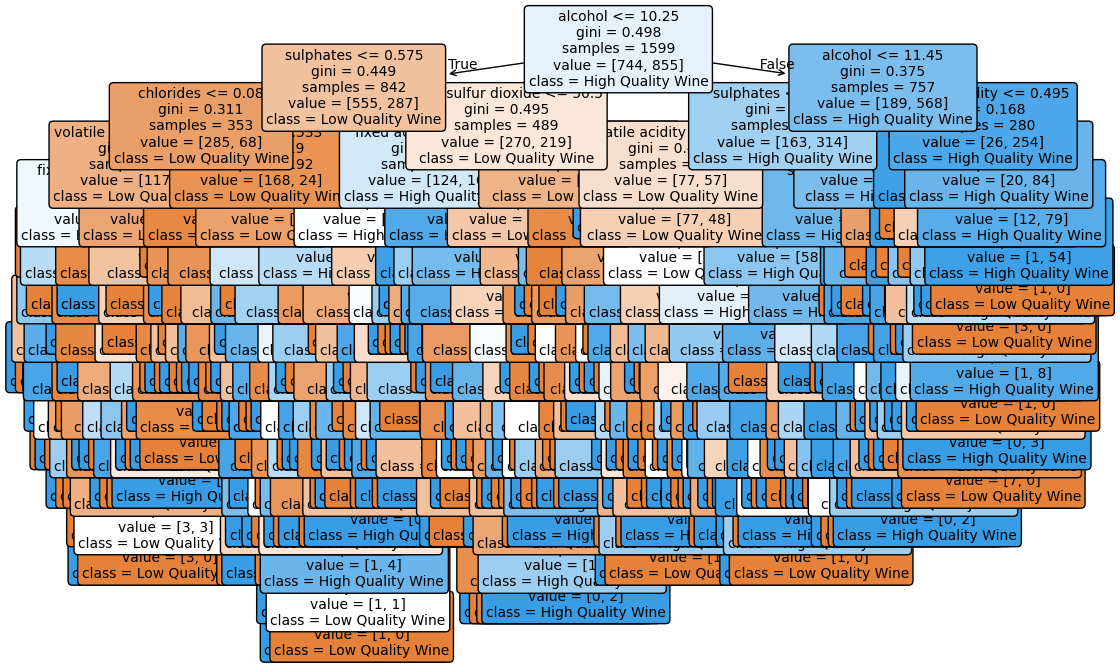

In [39]:
#First model will be a dihcision tree
dtc = DecisionTreeClassifier(random_state=42)
#Training the classifier
dtc.fit(X, Y)

accuracy_score = (cross_val_score(dtc, X, Y, cv=10, scoring='accuracy')).mean()
precision_score = (cross_val_score(dtc, X, Y, cv=10, scoring='precision')).mean()
recall_score = (cross_val_score(dtc, X, Y, cv=10, scoring='recall')).mean()
f1_score = (cross_val_score(dtc, X, Y, cv=10, scoring='f1')).mean()


print(f'Average Accuracy Score: {accuracy_score}')
print(f'Average Precision Score: {precision_score}')
print(f'Average Recall Score: {recall_score}')
print(f'Average F1 Score: {f1_score}')

plt.figure(figsize=(12, 8))  # Adjust the size as needed
plot_tree(dtc, 
          filled=True,        # Color the nodes
          feature_names=X.columns,  # Use your feature names
          class_names=['Low Quality Wine', 'High Quality Wine'],  # Class names if binary classification
          rounded=True,       # Round the corners of the nodes
          fontsize=10)        # Font size for labels
plt.show()

In [40]:
#Second model will be Gaussian Naive Bayes

gnb = GaussianNB()
gnb.fit(X, Y)

accuracy_score = (cross_val_score(gnb, X, Y, cv=10, scoring='accuracy')).mean()
precision_score = (cross_val_score(gnb, X, Y, cv=10, scoring='precision')).mean()
recall_score = (cross_val_score(gnb, X, Y, cv=10, scoring='recall')).mean()
f1_score = (cross_val_score(gnb, X, Y, cv=10, scoring='f1')).mean()


print(f'Average Accuracy Score: {accuracy_score}')
print(f'Average Precision Score: {precision_score}')
print(f'Average Recall Score: {recall_score}')
print(f'Average F1 Score: {f1_score}')

Average Accuracy Score: 0.718561320754717
Average Precision Score: 0.7437682555737805
Average Recall Score: 0.7260191518467853
Average F1 Score: 0.7291633297050873


In [41]:
#Third model will be KNN

sc = StandardScaler()
X_scaled = sc.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_scaled, Y)

accuracy_score = (cross_val_score(knn, X_scaled, Y, cv=10, scoring='accuracy')).mean()
precision_score = (cross_val_score(knn, X_scaled, Y, cv=10, scoring='precision')).mean()
recall_score = (cross_val_score(knn, X_scaled, Y, cv=10, scoring='recall')).mean()
f1_score = (cross_val_score(knn, X_scaled, Y, cv=10, scoring='f1')).mean()


print(f'Average Accuracy Score: {accuracy_score}')
print(f'Average Precision Score: {precision_score}')
print(f'Average Recall Score: {recall_score}')
print(f'Average F1 Score: {f1_score}')

Average Accuracy Score: 0.6772916666666666
Average Precision Score: 0.6905089305683865
Average Recall Score: 0.7342681258549932
Average F1 Score: 0.7041208155454912


In [42]:
lr = LogisticRegression(class_weight='balanced', fit_intercept=True)
lr.fit(X_scaled, Y)

accuracy_score = (cross_val_score(lr, X_scaled, Y, cv=10, scoring='accuracy')).mean()
precision_score = (cross_val_score(lr, X_scaled, Y, cv=10, scoring='precision')).mean()
recall_score = (cross_val_score(lr, X_scaled, Y, cv=10, scoring='recall')).mean()
f1_score = (cross_val_score(lr, X_scaled, Y, cv=10, scoring='f1')).mean()


print(f'Average Accuracy Score: {accuracy_score}')
print(f'Average Precision Score: {precision_score}')
print(f'Average Recall Score: {recall_score}')
print(f'Average F1 Score: {f1_score}')

Average Accuracy Score: 0.737932389937107
Average Precision Score: 0.7816803992625767
Average Recall Score: 0.7130232558139535
Average F1 Score: 0.7374635847964772
